In [18]:
import pandas as pd
from sklearn import linear_model
import numpy as np
import matplotlib.pyplot as plt

In [19]:
df = pd.read_csv("train.csv")
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [20]:
area  = df.area.median()
bedroom = df.bedrooms.median()
age = df.age.median()

In [21]:
df = df.fillna({
    'area':area,
    'bedrooms':bedroom,
    'age':  age
})
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,4.0,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


## Creating the model

In [22]:
reg = linear_model.LinearRegression()

## Training the model

In [23]:
df_new = df
df_new

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,4.0,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [24]:
y =df_new.pop('price')


In [25]:
df

,area,bedrooms,age
0,2600,3.0,20
1,3000,4.0,15
2,3200,4.0,18
3,3600,3.0,30
4,4000,5.0,8
5,4100,6.0,8


In [26]:
columns =[]
for i in df:
    columns.append(i)
columns

['area', 'bedrooms', 'age']

In [27]:
reg.fit(df[columns],y)

LinearRegression()

In [39]:
reg.score(df[columns],y)

0.9550196399325818

In [28]:
df

,area,bedrooms,age
0,2600,3.0,20
1,3000,4.0,15
2,3200,4.0,18
3,3600,3.0,30
4,4000,5.0,8
5,4100,6.0,8


In [29]:
df_eva = pd.read_csv("train.csv")
df_eva

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [30]:
df

,area,bedrooms,age
0,2600,3.0,20
1,3000,4.0,15
2,3200,4.0,18
3,3600,3.0,30
4,4000,5.0,8
5,4100,6.0,8


In [31]:
reg.predict([[2600,3,20]])

array([518217.63297611])

In [32]:
reg.predict([[3000,3,40]])

array([498408.25158031])

In [33]:
reg.coef_

array([  112.06244194, 23388.88007794, -3231.71790863])

In [34]:
reg.intercept_

221323.00186540443

In [35]:
get_df = reg.predict(df[columns])
get_df

array([518217.63297611, 602590.07937407, 615307.4140366 , 597962.89583192,
       760663.42675457, 795258.55102673])

In [36]:
df.to_csv('eva.csv',columns=columns)
df

,area,bedrooms,age
0,2600,3.0,20
1,3000,4.0,15
2,3200,4.0,18
3,3600,3.0,30
4,4000,5.0,8
5,4100,6.0,8


In [37]:
df['price'] = get_df
df

,area,bedrooms,age,price
0,2600,3.0,20,518217.632976
1,3000,4.0,15,602590.079374
2,3200,4.0,18,615307.414037
3,3600,3.0,30,597962.895832
4,4000,5.0,8,760663.426755
5,4100,6.0,8,795258.551027


C:\Users\Shadin\AppData\Local\Temp/ipykernel_13648/3010793609.py:2: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "ro" (-> marker='o'). The keyword argument will take precedence.
  plt.plot(df_eva[['area','bedrooms','age']],df_eva['price'],'ro',marker='+')


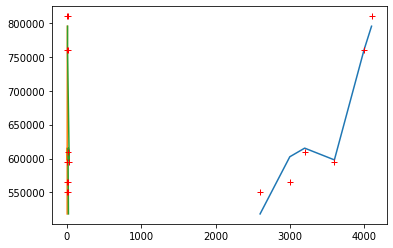

In [38]:
plt.plot(df[['area','bedrooms','age']],df['price'],)
plt.plot(df_eva[['area','bedrooms','age']],df_eva['price'],'ro',marker='+')